# Analise comparativa das ferramentas: Maltego, Netcraft e Texugo Scan 

# Tempo de Execução:  Netcraft e Texugo Scan


In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy import stats

de = pd.read_csv('Validação TCC - Tempo de Execucao (2).csv');
dt=pd.read_csv('TecnologiasEncontradas.csv');
ds=pd.read_csv('SubdominiosEncontrados.csv');
dc=pd.read_csv('Validação TCC - Resultados (Completude) .csv');
analiseTexugo= pd.read_csv('Validação TCC - Página8.csv');

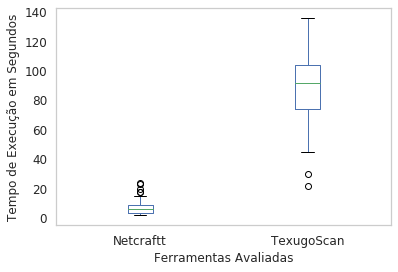

In [46]:
boxplot = de.boxplot(column=['Netcraftt','TexugoScan'],grid=False, rot=0, fontsize=12)
boxplot.set_ylabel('Tempo de Execução em Segundos', fontsize=12)
boxplot.set_xlabel('Ferramentas Avaliadas', fontsize=12)
plt.savefig('AnaliseTempoDeExecucao.pdf')

In [4]:
de.describe()

,TexugoScan,Netcraftt
count,51.000000,51.000000
mean,88.240082,7.029216
std,25.123687,5.273178
min,21.376891,1.440000
25%,74.096356,3.215000
50%,91.268582,5.670000
75%,103.785555,8.690000
max,135.849723,23.600000


# Variância  de Enumeração de Subdomínios Netcraft

In [6]:
de['Netcraftt'].var()

27.80640737254902

In [55]:
ds['Maltego'].var()

42.54588235294117

# Teste T independente aplicado ao Texugo Scan e Maltego

Media Maltego

In [75]:
ds['Maltego'].mean()

6.882352941176471

In [ ]:
Media Texugo Scan

In [83]:
ds['Texugo Scan'].mean()

120.52083333333333

In [84]:
stats.ttest_ind(ds['Texugo Scan'], ds['Maltego'], equal_var = False, nan_policy = 'omit')


Ttest_indResult(statistic=2.6287918594352715, pvalue=0.011538830946049792)

# Teste T independente aplicado ao Texugo Scan e Netcraft

Media do Netcraft

In [78]:
ds['Netcraft'].mean()

2.019607843137255

In [ ]:
Media do Texugo Scan 

In [79]:
ds['Texugo Scan'].mean()

120.52083333333333

In [80]:
stats.ttest_ind(ds['Texugo Scan'], ds['Netcraft'], equal_var = False, nan_policy = 'omit')


Ttest_indResult(statistic=2.7415789931696484, pvalue=0.008620018735277249)

In [106]:
de.head()

,Alvos,TexugoScan,Netcraftt
0,http://www.carnaubais.rn.gov.br/,113.198075,1.44
1,https://assu.rn.gov.br/,74.096356,4.66
2,http://angicos.rn.gov.br/,97.482019,3.26
3,https://www.fernandopedroza.rn.gov.br/,86.822487,5.75
4,https://www.afonsobezerra.rn.gov.br/,82.764875,6.10


# Identificação de Tecnologias 

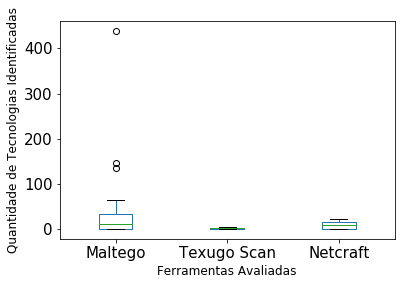

In [36]:

boxplotDt=dt.boxplot(column=["Maltego","Texugo Scan","Netcraft"],grid=False, rot=0, fontsize=15)
boxplotDt.set_ylabel('Quantidade de Tecnologias Identificadas', fontsize=12)
boxplotDt.set_xlabel('Ferramentas Avaliadas', fontsize=12)

plt.savefig('IdentificacaoDeTecnologias.pdf')

# Teste T independente aplicado ao Texugo Scan e Maltego

Media do Texugo Scan

In [85]:
dt['Texugo Scan'].mean()

2.0588235294117645

In [ ]:
Media do Maltego

In [86]:
dt['Maltego'].mean()

28.392156862745097

In [88]:
stats.ttest_ind(dt['Texugo Scan'], dt['Maltego'], equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=-2.8738397130675533, pvalue=0.00593655999431483)

# Teste T independente aplicado ao Texugo Scan e Netcraft

In [89]:
stats.ttest_ind(dt['Texugo Scan'], dt['Netcraft'], equal_var = False, nan_policy = 'omit')


Ttest_indResult(statistic=-5.601035265170893, pvalue=6.912880533099614e-07)

# Enumeração de Subdomínios 

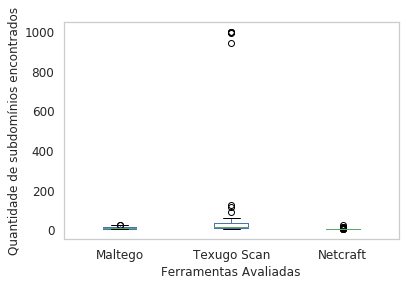

In [50]:
bloxplotDS=ds.boxplot(column=['Maltego','Texugo Scan','Netcraft'],grid=False,rot=0, fontsize=12)
bloxplotDS.set_ylabel('Quantidade de subdomínios encontrados', fontsize=12)
bloxplotDS.set_xlabel('Ferramentas Avaliadas', fontsize=12)

plt.savefig('EnumeracaoSubdominios.pdf')

In [5]:
ds.describe()

,Maltego,Texugo Scan,Netcraft
count,51.000000,48.000000,51.000000
mean,6.882353,120.520833,2.019608
std,6.522720,299.428320,4.675426
min,0.000000,0.000000,0.000000
25%,2.500000,5.000000,0.000000
50%,5.000000,12.000000,0.000000
75%,10.000000,33.250000,0.000000
max,24.000000,999.000000,22.000000


# Teste T independente Texugo Scan e Netcraft

Media do Texugo Scan

In [81]:
ds['Texugo Scan'].mean()

120.52083333333333

In [ ]:
Media do Netcraft

In [82]:
ds['Netcraft'].mean()

2.019607843137255

# Completude de dados

Completude dos retornos das ferramentas de acordo com o retorno das funcionalidades presentes, False significa que a ferramenta não retornou os dados necessário   

In [65]:
dc[dc.T1==True].groupby(['Ferramenta','T1']).size()

Ferramenta   T1  
Maltego      True    46
Netcraft     True    50
Texugo Scan  True    41
dtype: int64

In [66]:
dc[dc.T2==True].groupby(['Ferramenta','T2']).size()

Ferramenta   T2  
Netcraft     True     1
Texugo Scan  True    42
dtype: int64

In [67]:
dc[dc.T3==True].groupby(['Ferramenta','T3']).size()

Ferramenta   T3  
Maltego      True    47
Netcraft     True     6
Texugo Scan  True    40
dtype: int64

In [68]:
dc[dc.T4==True].groupby(['Ferramenta','T4']).size()

Ferramenta   T4  
Maltego      True    46
Netcraft     True    33
Texugo Scan  True    42
dtype: int64

In [69]:
dc[dc.T5==True].groupby(['Ferramenta','T5']).size()

Ferramenta   T5  
Maltego      True     1
Netcraft     True    32
Texugo Scan  True    42
dtype: int64

In [70]:
dc[dc.T6==True].groupby(['Ferramenta','T6']).size()

Ferramenta   T6  
Maltego      True    38
Netcraft     True    43
Texugo Scan  True    31
dtype: int64

In [64]:
dc[dc.T7==True].groupby(['Ferramenta','T7']).size()

Ferramenta   T7  
Maltego      True    33
Netcraft     True    34
Texugo Scan  True    27
dtype: int64

In [90]:
data = [{'Tecnica':'WhoIs', 'TexugoScan':41, 'Maltego':46, 'NetCraft':50},
{'Tecnica':'PortScan', 'TexugoScan':42, 'Maltego':0, 'NetCraft':1}, 
{'Tecnica':'Subdomain enumeration', 'TexugoScan':40, 'Maltego':47, 'NetCraft':6}, 
{'Tecnica':'Netblock Identification', 'TexugoScan':42, 'Maltego':46, 'NetCraft':33}, 
{'Tecnica':'Banner Grabbing', 'TexugoScan':42, 'Maltego':1, 'NetCraft':32}, 
{'Tecnica':'Reverse DNS Identification',  'TexugoScan':31, 'Maltego':38, 'NetCraft':43}, 
{'Tecnica':'Technology Identification', 'TexugoScan':27, 'Maltego':33, 'NetCraft':34}]

In [91]:
#data = [{'WhoIs':46,'PortScan':0,'SubDomainEnum':47,'NetBlockIdent':46,'BannerGrabbing':1,'ReverseDNS':38,'TecIdent':33,'Ferramenta':'Maltego' }, 
#       {'WhoIs':50,'PortScan':1,'SubDomainEnum':6,'NetBlockIdent':33,'BannerGrabbing':32,'ReverseDNS':43,'TecIdent':34,'Ferramenta':'NetCraft' },
#        {'WhoIs':41,'PortScan':42,'SubDomainEnum':40,'NetBlockIdent':42,'BannerGrabbing':42,'ReverseDNS':31,'TecIdent':27,'Ferramenta':'TexugoScan' }
#       ] 
  
# Creates DataFrame. 
df = pd.DataFrame(data) 
  
# Print the data 
df 


,Tecnica,TexugoScan,Maltego,NetCraft
0,WhoIs,41,46,50
1,PortScan,42,0,1
2,Subdomain enumeration,40,47,6
3,Netblock Identification,42,46,33
4,Banner Grabbing,42,1,32
5,Reverse DNS Identification,31,38,43
6,Technology Identification,27,33,34


# Grafico de dispersão: Relação Tempo e Quantidade de Subdomínios Encontrados

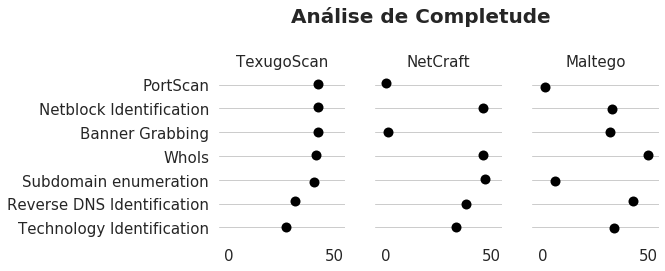

In [92]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset

# Make the PairGrid
g = sns.PairGrid(df.sort_values("TexugoScan", ascending=False),
                 x_vars=df.columns[1:], y_vars=["Tecnica"],
                 height=4, aspect=.6, despine=True)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", color="black")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-5, 55), xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['TexugoScan','NetCraft', 'Maltego']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set_title(title, fontsize=15)

    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.tick_params(axis='x', which='major', labelsize=15)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.subplots_adjust(top=.75)
g.fig.suptitle('Análise de Completude', fontweight='bold', fontsize=20)
g.fig.savefig('completude.pdf', bbox_inches='tight')

In [8]:
de.head()

,Alvos,TexugoScan,Netcraftt
0,http://www.carnaubais.rn.gov.br/,113.198075,1.44
1,https://assu.rn.gov.br/,74.096356,4.66
2,http://angicos.rn.gov.br/,97.482019,3.26
3,https://www.fernandopedroza.rn.gov.br/,86.822487,5.75
4,https://www.afonsobezerra.rn.gov.br/,82.764875,6.10


In [12]:
juntarNetcraft= pd.concat([ds['Netcraft'], de['Netcraftt']],axis=1)
juntarTexugo= pd.concat([ds['Texugo Scan'], de['TexugoScan']],axis=1)

In [ ]:
juntarTexugo= pd.concat([ds['Texugo Scan'], de['TexugoScan']],axis=1)

In [14]:
juntarTexugo.head()

,Texugo Scan,TexugoScan
0,12.0,113.198075
1,11.0,74.096356
2,10.0,97.482019
3,10.0,86.822487
4,10.0,82.764875


In [11]:
juntarNetcraft.head()

,Netcraft,Netcraftt
0,0,1.44
1,11,4.66
2,0,3.26
3,0,5.75
4,0,6.10


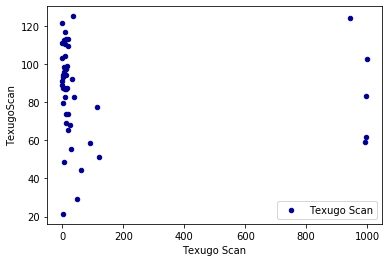

In [15]:
plotagem= juntarTexugo.plot.scatter(x='Texugo Scan', y='TexugoScan', color='DarkBlue', label='Texugo Scan');

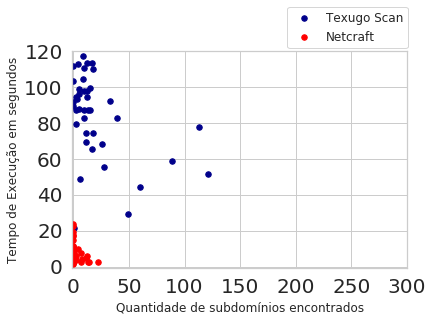

In [47]:
ax =  juntarTexugo.plot.scatter(x='Texugo Scan', y='TexugoScan', color='DarkBlue', 
                            label='Texugo Scan', s=30, fontsize=20);
juntarNetcraft.plot.scatter(x='Netcraft', y='Netcraftt', color='red', 
                       label='Netcraft', ax=ax, s=30, fontsize=20);
ax.legend(bbox_to_anchor=(1.02, 1.23), prop={'size': 12})
ax.set_xlim([-1,300])
ax.set_ylim([-1,120])
ax.set_xlabel('Quantidade de subdomínios encontrados', fontsize=12)
ax.set_ylabel('Tempo de Execução em segundos', fontsize=12)
ax.grid(True, which='both')
plt.savefig('relacaoTempo&Subdominios.pdf', bbox_inches='tight')


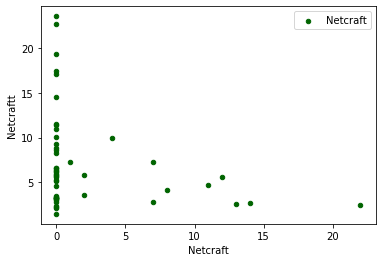

In [135]:
value=juntar.plot.scatter('Netcraft','Netcraftt',color='DarkGreen', label='Netcraft');
